<a href="https://colab.research.google.com/github/Martin-William/Wills-Code/blob/main/CondensedCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


PX2236 - Introduction to Condensed Matter Physics

CA Problem 1 (15% of Module Mark)

This coursework is due to be handed in online via Learning Central on
Fri 11 Mar 2022, at 14:00. There will be no opportunity to hand in physically.
Digital photos (eg phone) of your workings are acceptable as long as they are
clear and readable, but please try to type up your answers and embed any
images. I will not accept coursework by email.

This exercise is designed to aid your understanding of X-ray diffraction. It
should also demonstrate to you that even 2nd year physics knowledge can
take you a long way in terms of interpreting real data.

We saw during the lectures that a collimated X-ray beam will be diffracted
from different crystal planes. These diffracted beams can be observed as
Laue spots on a photographic plate placed after the crystal. However, there
are a number of advantages to performing the same experiment in a slightly
different geometry, as described in figure 1. Here the photographic plate is
placed between the X-ray source and the crystal. The X-ray beam travels
though a hole in the centre of the photographic plate, and the reflected X-ray
beams are directed backwards in the direction of the X-ray source.

![]

Figure 1: X-ray diffraction in the back-scattering geometry. 

The X-ray is propagating in the positive ˆk direction and the scattered (reflected) X-ray beams are directed backwards in the direction of the X-ray source. The point P is the Laue spot formed by reflection off the crystal plane (hkl).

#Problem:

Certain ideal cases have very simple analytical solutions. For example, if the crystal has a cubic lattice, and it is orientated so that the face (1 0 0) is perpendicular to the incoming X-ray beam, then the cartesian coordinates
(x, y)hkl of the back-scattered Laue spots associated with the crystal plane
(hkl) are given by the simple equation,

$
(x, y)_{hkl} = (h, k) \frac{2l}{h2 + k2 − l2}D , (1)
$

where D is the distance between the crystal and the photographic plate.

Then by considering all the possible integer values h, k, l we can map out all
the Laue spots in the plane of the photographic plate (here the x − y plane,
using the geometry in figure 1).

- Part (a): As a first approximation consider h, k, l = 0, ±1, ±2 ± 3. Construct a table of with all the unique permutations and use this to calculate
the corresponding positions (x, y) of the Laue spots in the x − y plane. You
can assume for simplicity that D = 1. Feel free to use any software you wish
(such as Excel or Python etc) if it makes this task easier. [15 marks]

- Part (b): Making reference to this table, can you explain why some Laue spots
might be more pronounced (brighter or darker) than others? [5 marks]

- Part (c): Use the values in your table to plot out the expected Laue spot
pattern. Note that it is important to realise that the photographic plate does not extend to infinity. Plot your results in a square window where the axes only go as far as x = ±1.1 and y = ±1.1. Ignore Laue spots that are scattered at
higher angles that would miss the photographic plate. [20 marks]

- Part (d): Compare your result against a real X-ray diffraction pattern recorded
for single crystal NaCl in figure 2, and identify which planes produced the
spots labelled A-J. [20 marks]

- Part (e): Using the geometry described in figure 1, together with the Laue
condition, prove that equation (1) does indeed give the correct position of the
Laue spots. [40 marks]


[[-3.         -3.         -3.          2.          2.        ]
 [-3.         -3.         -2.          0.85714286  0.85714286]
 [-3.         -3.         -1.          0.35294118  0.35294118]
 ...
 [ 3.          3.          1.          0.35294118  0.35294118]
 [ 3.          3.          2.          0.85714286  0.85714286]
 [ 3.          3.          3.          2.          2.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in long_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


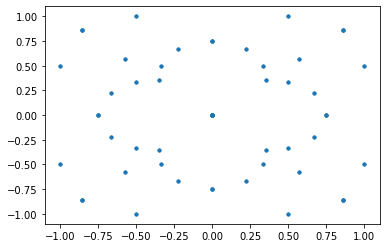

In [36]:
#creates an 
array = np.array(list(itertools.product([-3,-2,-1,0,1, 2, 3], repeat=3)))

#print (array)

i1 = np.array([1])
i2 = np.array([1])
x = np.array([1])
y = np.array([1])

for i in array:
  h = i[0]
  k = i[1]
  l = i[2]

  i1 = np.r_[ i1, (2*k*l)/((k**2)+(h**2)-(l**2))]
  i2 = np.r_[ i2,(2*h*l)/((k**2)+(h**2)-(l**2))]

  #print(i)
  #print('x = 2kl/(k^2+h^2-l^2) = ',(2*k*l)/((k**2)+(h**2)-(l**2)),'\ny = 2hl/(k^2+h^2-l^2) =', (2*h*l)/((k**2)+(h**2)-(l**2)))

i1 = i1[1:]
i2 = i2[1:]


print(np.c_[ array, i1, i2])

a = 0
for i in i1:
  if (i <= 1) & (i >= -1):
    if (i2[a] <= 1) & (i2[a] >= -1):
      x = np.r_[x, i]
      y = np.r_[y, i2[a]]
  a = a + 1    

x = x[1:]
y = y[1:]

plt.plot(x,y,'.')